In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd

# Multi-dimensional arrays and datasets
import xarray as xr

# Geospatial raster data handling
import rioxarray as rxr

# Geospatial data analysis
import geopandas as gpd

# Geospatial operations
import rasterio
from rasterio import windows  
from rasterio import features  
from rasterio import warp
from rasterio.warp import transform_bounds 
from rasterio.windows import from_bounds 

# Image Processing
from PIL import Image

# Coordinate transformations
from pyproj import Proj, Transformer, CRS

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Planetary Computer Tools
import pystac_client
import planetary_computer as pc
from pystac.extensions.eo import EOExtension as eo

# Others
import os
from tqdm import tqdm

In [1]:
import yaml

with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)

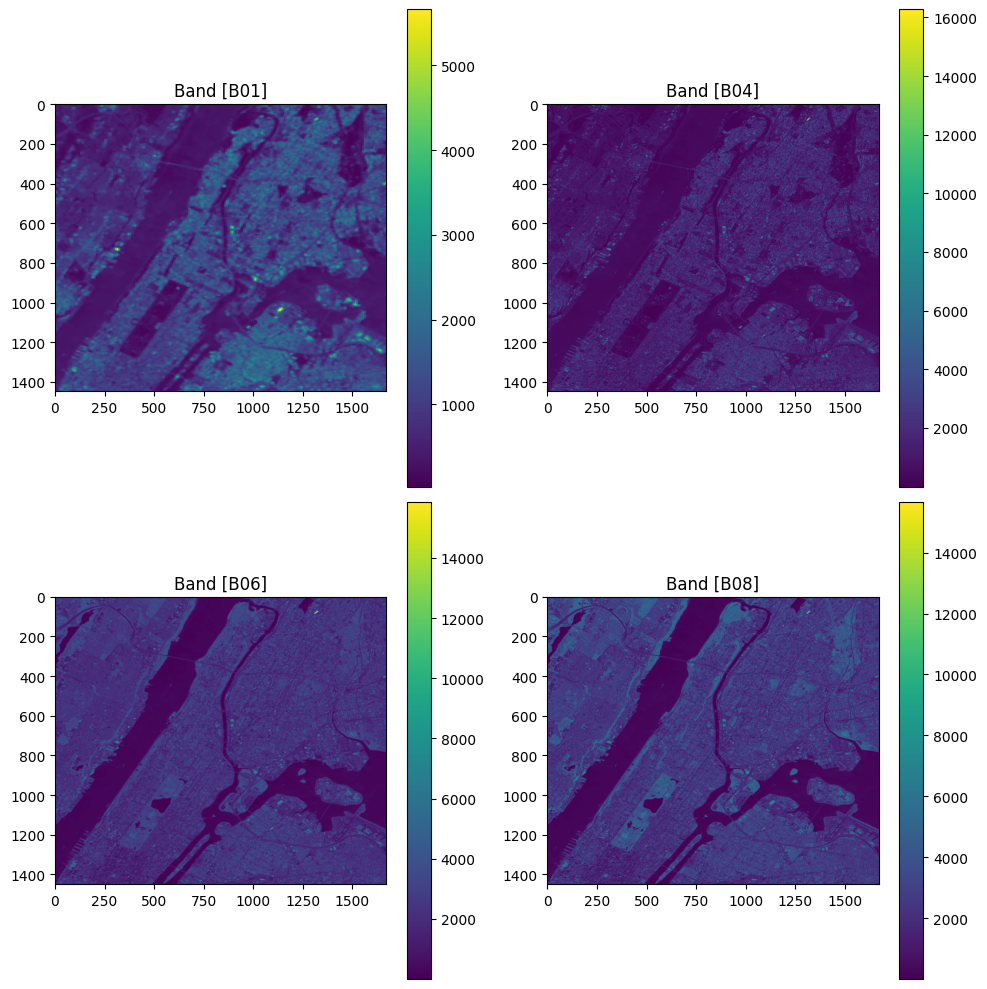

In [11]:
# Reads and plots four bands (B04, B08, B06, B01) from the GeoTIFF file.

# Open the GeoTIFF file
tiff_path = "data/tiff/sentinel_2.tiff"

# Read the bands from the GeoTIFF file
with rasterio.open(tiff_path) as src1:
    band1 = src1.read(1)  # Band [B01]
    band2 = src1.read(4)  # Band [B04]
    band3 = src1.read(6)  # Band [B06]
    band4 = src1.read(8)  # Band [B08]

# Plot the bands in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot the first band (B01)
im1 = axes[0].imshow(band1, cmap='viridis')
axes[0].set_title('Band [B01]')
fig.colorbar(im1, ax=axes[0])

# Plot the second band (B04)
im2 = axes[1].imshow(band2, cmap='viridis')
axes[1].set_title('Band [B04]')
fig.colorbar(im2, ax=axes[1])

# Plot the third band (B06)
im3 = axes[2].imshow(band3, cmap='viridis')                 
axes[2].set_title('Band [B06]')
fig.colorbar(im3, ax=axes[2])

# Plot the fourth band (B08)
im4 = axes[3].imshow(band4, cmap='viridis')
axes[3].set_title('Band [B08]')
fig.colorbar(im4, ax=axes[3])

plt.tight_layout()
plt.show()


In [4]:
import requests
import json

# ArcGIS Feature Service URL
base_url = "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/LION/FeatureServer/0/query"
# "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/LION/FeatureServer/0/query"
# "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/LION_Node/FeatureServer/0/query"
# "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nyzd/FeatureServer/0/query"
# "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nyco/FeatureServer/0/query"
# "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nysp/FeatureServer/0/query"
# "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nylh/FeatureServer/0/query"
# "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nysp_sd/FeatureServer/0/query"
# "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nyzma/FeatureServer/0/query"
# "https://data.cityofnewyork.us/resource/5zhs-2jue.geojson"
# "https://data.cityofnewyork.us/resource/7ym2-wayt.json"



# Define query parameters
params = {
    "where": "1=1",         # Get all records
    "outFields": "*",       # Get all available fields
    "f": "json",          # Get data in JSON format
    "resultRecordCount": 4000,  # Maximum records per request
    "start": 0,
}

all_data = []

while True:
    # Send request
    response = requests.get(base_url, params=params)
    if response.status_code != 200:
        print(f"❌ Error {response.status_code}: {response.text}")
        break
        
    data = response.json()

    # Check if there is data to append
    if 'features' in data and data['features']:
        all_data.extend(data['features'])

    # Check if there is more data to fetch
    if len(data['features']) < 4000:
        break  # If less than 4000, it's the last batch

    # Increment the start index for the next batch
    params['start'] = params['start'] + 4000


# Check response status
if response.status_code == 200:
    data = response.json()
    with open("data.json", "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

    print("✅ GeoJSON data saved successfully as 'data.geojson'!")
else:
    print(f"Error {response.status_code}: {response.text}")


# LIMIT = 50000  # Max rows per request for SODA 2.0
# OFFSET = 0     # Start from the beginning
# ALL_DATA = []

# while OFFSET < 200000:
#     # Construct API request URL with limit & offset
#     url = f"{base_url}?$limit={LIMIT}&$offset={OFFSET}"
    
#     # Send GET request
#     response = requests.get(url)

#     if response.status_code != 200:
#         print(f"❌ Error {response.status_code}: {response.text}")
#         break

#     # Convert response to JSON
#     data = response.json()

#     if not data:
#         print("✅ All data fetched!")
#         break  # Stop when no more data is returned

#     # Append to list
#     ALL_DATA.extend(data)

#     # Print progress
#     print(f"✅ Retrieved {len(ALL_DATA)} rows (Offset: {OFFSET})")

#     # Move to next batch
#     OFFSET += LIMIT

✅ Retrieved 50000 rows (Offset: 0)
✅ Retrieved 100000 rows (Offset: 50000)
✅ Retrieved 150000 rows (Offset: 100000)
✅ Retrieved 200000 rows (Offset: 150000)


In [5]:
ALL_DATA

[{'the_geom': {'type': 'MultiPolygon',
   'coordinates': [[[[-73.96664570466969, 40.62599676998366],
      [-73.96684846176461, 40.625977490862574],
      [-73.96685938726297, 40.62604419372411],
      [-73.96661621040211, 40.62606731716107],
      [-73.96660638332114, 40.626007324369795],
      [-73.96664680403327, 40.626003480977275],
      [-73.96664570466969, 40.62599676998366]]]]},
  'bin': '3170958',
  'cnstrct_yr': '1925',
  'lstmoddate': '2017-08-22T00:00:00.000',
  'lststatype': 'Constructed',
  'doitt_id': '96807',
  'heightroof': '29.74985318',
  'feat_code': '2100',
  'groundelev': '40',
  'shape_area': '0.0',
  'shape_len': '0.0',
  'base_bbl': '3065220021',
  'mpluto_bbl': '3065220021',
  'geomsource': 'Photogramm',
  'globalid': '{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}'},
 {'the_geom': {'type': 'MultiPolygon',
   'coordinates': [[[[-74.16790202462265, 40.63936048076975],
      [-74.16790466499279, 40.63928227843778],
      [-74.16799990780702, 40.63928414478843],
      [-

In [16]:
import requests
import json
from time import sleep

def load_arcgis_geojson(url, max_records_per_query=4000, sleep_time=0.1):
    # First, get all ObjectIDs
    params = {
        'where': '1=1',
        'returnIdsOnly': 'true',
        'f': 'json'
    }
    
    response = requests.get(url, params=params)
    object_ids = response.json()['objectIds']
    
    if not object_ids:
        raise ValueError("No objects found in the service")
    
    # Sort ObjectIDs to ensure consistent pagination
    object_ids.sort()
    
    # Initialize GeoJSON structure
    geojson = {
        "type": "FeatureCollection",
        "features": []
    }
    
    # Process in chunks based on max_records_per_query
    for i in range(0, len(object_ids), max_records_per_query):
        chunk = object_ids[i:i + max_records_per_query]
        
        # Create where clause for current chunk
        where_clause = f"OBJECTID >= {chunk[0]} AND OBJECTID <= {chunk[-1]}"
        
        # Query parameters for GeoJSON format
        params = {
            'where': where_clause,
            'outFields': '*',  # Get all fields
            'returnGeometry': 'true',
            'f': 'geojson'    # Request GeoJSON format directly
        }
        
        # Make request
        response = requests.get(url, params=params)
        data = response.json()
        
        if 'features' in data:
            geojson['features'].extend(data['features'])
        
        # Sleep to avoid overwhelming the server
        sleep(sleep_time)
        
        # Print progress
        print(f"Loaded {len(geojson['features'])} features out of {len(object_ids)} total")
    
    # Copy any additional properties from the last response
    for key in data.keys():
        if key != 'features':
            geojson[key] = data[key]
    
    return geojson

def save_geojson(geojson_data, filename):
    """
    Save GeoJSON data to a file.
    
    Parameters:
    geojson_data (dict): GeoJSON data to save
    filename (str): Output filename (should end with .geojson)
    """
    with open(filename, 'w') as f:
        json.dump(geojson_data, f)

# Example usage
if __name__ == "__main__":
    # Your ArcGIS REST endpoint
    url = "https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/LION/FeatureServer/0"
    
    try:
        # Load all features in GeoJSON format
        geojson_data = load_arcgis_geojson(url)
        
        # Save to file
        save_geojson(geojson_data, 'lion_data.geojson')
        
        print(f"\nSuccessfully loaded {len(geojson_data['features'])} features")
        print(f"Data saved to lion_data.geojson")
        
    except Exception as e:
        print(f"Error loading data: {str(e)}")

Loaded 4000 features out of 241206 total
Loaded 8000 features out of 241206 total

Successfully loaded 8000 features
Data saved to lion_data.geojson


In [108]:
import ijson
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape

# features = []

# with open("data/raw/building.json", "r", encoding="utf-8") as f:
#     for feature in ijson.items(f, "item"):  # Adjust based on your structure
#         features.append(feature)

# df = gpd.GeoDataFrame(features)
# df.head()

file = "data/preprocessed/street.geojson"
df = gpd.read_file(file)
df.shape

(40147, 29)

In [116]:
file = "data/preprocessed/street.geojson"
df = gpd.read_file(file)
df.head()

,OBJECTID,Join_ID,StreetCode,Street,TrafDir,StreetWidth_Min,StreetWidth_Max,RW_TYPE,POSTED_SPEED,Number_Travel_Lanes,...,YTo,ArcCenterX,ArcCenterY,NodeIDFrom,NodeIDTo,NodeLevelF,NodeLevelT,TRUCK_ROUTE_TYPE,Shape__Length,geometry
0,1,2251001000000,226700,EAST 168 STREET,T,34.0,34.0,1,25,2,...,241555,0,0,0047740,9045677,M,M,,396.030947,"LINESTRING (-73.90347 40.83036, -73.90238 40.8..."
1,2,2798401000000,274810,WEST 192 STREET,A,30.0,30.0,1,25,1,...,255164,0,0,0048679,0048678,M,M,,279.360514,"LINESTRING (-73.9012 40.86662, -73.90207 40.86..."
2,3,2728001000000,270420,UNION AVENUE,W,34.0,34.0,1,25,1,...,240230,0,0,0047288,0047822,M,M,,618.327133,"LINESTRING (-73.90118 40.8244, -73.90051 40.82..."
3,4,21279502000000X,270420,UNION AVENUE,W,34.0,34.0,1,25,1,...,240230,0,0,0047288,0047822,M,M,,618.327133,"LINESTRING (-73.90118 40.8244, -73.90051 40.82..."
4,5,21279503000000X,270420,UNION AVENUE,W,34.0,34.0,1,25,1,...,240230,0,0,0047288,0047822,M,M,,618.327133,"LINESTRING (-73.90118 40.8244, -73.90051 40.82..."


In [133]:
def convert_to_float(feature):
    feature = feature.str.strip()
    feature = np.where(feature == '', None, feature)
    return feature.astype('float')

df['RW_TYPE'].astype('int')
# df['Number_Travel_Lanes'] = convert_to_float(df['Number_Travel_Lanes'])
# df['Number_Park_Lanes'] = convert_to_float(df['Number_Park_Lanes'])
# df['Number_Total_Lanes'] = convert_to_float(df['Number_Total_Lanes'])
df['SegmentTyp'].unique()

array(['U', 'B', 'R', 'T', 'S', 'E', 'C'], dtype=object)

In [ ]:
from pyproj import Transformer

# Define the transformer from EPSG:2236 to EPSG:4326
transformer = Transformer.from_crs("EPSG:2263", "EPSG:4326", always_xy=True)

# Apply the transformation to the whole column
# df[['XFrom', 'YFrom']] = df.apply(lambda row: pd.Series(transformer.transform(row['XFrom'], row['YFrom'])), axis=1)
# df[['XTo', 'YTo']] = df.apply(lambda row: pd.Series(transformer.transform(row['XTo'], row['YTo'])), axis=1)
# df[['XTo', 'YTo']]


,XTo,YTo
0,-73.902382,40.829647
1,-73.902074,40.866999
2,-73.900505,40.826008
3,-73.900505,40.826008
4,-73.900505,40.826008
...,...,...
40142,-73.936476,40.767670
40143,-73.936184,40.767692
40144,-73.936567,40.767708
40145,-73.936567,40.767637


In [136]:
def street_direction(coords_features):
    dx = coords_features['XTo'] - coords_features['XFrom']  # Change in longitude
    dy = coords_features['YTo'] - coords_features['YFrom']  # Change in latitude

    angle = np.degrees(np.arctan2(dy, dx))  # Convert angle to degrees
    
    # Adjust to fit compass direction
    angle = np.where(angle < 0, angle+360, angle)

    
    # Determine direction based on angle
    condlist = [
        ((22.5 <= angle) & (angle < 67.5)) | ((157.5 <= angle) & (angle < 202.5)),  # NE-SW
        ((67.5 <= angle) & (angle < 112.5)) | ((247.5 <= angle) & (angle < 292.5)), # N-S
        ((112.5 <= angle) & (angle < 157.5)) | ((292.5 <= angle) & (angle < 337.5)) # NW-SE
    ]
    choicelist = ["NE-SW", "N-S", "NW-SE"]
    return np.select(condlist, choicelist, "E-W")

street_direction(df[['XFrom', 'YFrom', 'XTo', 'YTo']])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [117]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40147 entries, 0 to 40146
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             40147 non-null  int32   
 1   Join_ID              40147 non-null  object  
 2   StreetCode           40147 non-null  object  
 3   Street               40147 non-null  object  
 4   TrafDir              40147 non-null  object  
 5   StreetWidth_Min      35608 non-null  float64 
 6   StreetWidth_Max      35629 non-null  float64 
 7   RW_TYPE              40147 non-null  object  
 8   POSTED_SPEED         40147 non-null  object  
 9   Number_Travel_Lanes  40147 non-null  object  
 10  Number_Park_Lanes    40147 non-null  object  
 11  Number_Total_Lanes   40147 non-null  object  
 12  LBlockFaceID         40147 non-null  object  
 13  RBlockFaceID         40147 non-null  object  
 14  FeatureTyp           40147 non-null  object  
 15  SegmentTyp 

In [112]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 61008 entries, 0 to 61007
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   bin         61008 non-null  int32         
 1   cnstrct_yr  61008 non-null  int32         
 2   lstmoddate  61008 non-null  datetime64[ms]
 3   lststatype  61008 non-null  object        
 4   doitt_id    61008 non-null  object        
 5   heightroof  61008 non-null  float64       
 6   feat_code   61008 non-null  int32         
 7   groundelev  60973 non-null  object        
 8   shape_area  61008 non-null  float64       
 9   shape_len   61008 non-null  object        
 10  base_bbl    61008 non-null  object        
 11  mpluto_bbl  61008 non-null  object        
 12  geomsource  61001 non-null  object        
 13  globalid    61008 non-null  object        
 14  name        578 non-null    object        
 15  geometry    61008 non-null  geometry      
dtypes: datetime64[

In [114]:
df['cnstrct_yr'].describe()

count    61008.000000
mean      1931.416503
std         34.217232
min       1758.000000
25%       1910.000000
50%       1922.000000
75%       1945.000000
max       2021.000000
Name: cnstrct_yr, dtype: float64

In [109]:
# COORDS = [-74.01, 40.75, -73.86, 40.88]
# df_filter = df.cx[COORDS[0]:COORDS[2], COORDS[1]:COORDS[3]]

df_filter['RW_TYPE'].str.strip().unique()

is_street = ~df_filter['FeatureTyp'].isin(['2', '5', '7', '9', 'F'])
not_imaginary = ~df_filter['SegmentTyp'].isin(['G', 'F'])
canyon_type = ~df_filter['RW_TYPE'].isin([' 4', '12', '14'])
constructed = df_filter['Status'] == "2"

df_filter[is_street & not_imaginary & canyon_type & constructed].shape

# feature_to_keep = ['OBJECTID', 'Join_ID', 'StreetCode', 'Street', 
#                    'TrafDir', 'StreetWidth_Min', 'StreetWidth_Max', 'RW_TYPE', 'POSTED_SPEED'
#                    'Number_Travel_Lanes', 'Number_Park_Lanes', 'Number_Total_Lanes',
#                    'LBlockFaceID', 'RBlockFaceID',
#                    'FeatureTyp', 'SegmentTyp',
#                     'XFrom', 'YFrom', 'XTo', 'YTo', 'ArcCenterX', 'ArcCenterY',
#                     'NodeIDFrom', 'NodeIDTo', 'NodeLevelF', 'NodeLevelT',
#                     'TRUCK_ROUTE_TYPE', 'Shape__Length', 'geometry']



(40147, 130)

In [94]:
for col in df_filter.columns:
    print(col)

OBJECTID
Street
SAFStreetName
FeatureTyp
SegmentTyp
IncExFlag
RB_Layer
NonPed
TrafDir
TrafSrc
SpecAddr
FaceCode
SeqNum
StreetCode
SAFStreetCode
LGC1
LGC2
LGC3
LGC4
LGC5
LGC6
LGC7
LGC8
LGC9
BOE_LGC
SegmentID
SegCount
LocStatus
LZip
RZip
LBoro
RBoro
L_CD
R_CD
LATOMICPOLYGON
RATOMICPOLYGON
LCT2020
LCT2020Suf
RCT2020
RCT2020Suf
LCB2020
LCB2020Suf
RCB2020
RCB2020Suf
LCT2010
LCT2010Suf
RCT2010
RCT2010Suf
LCB2010
LCB2010Suf
RCB2010
RCB2010Suf
LCT2000
LCT2000Suf
RCT2000
RCT2000Suf
LCB2000
LCB2000Suf
RCB2000
RCB2000Suf
LCT1990
LCT1990Suf
RCT1990
RCT1990Suf
LAssmDist
LElectDist
RAssmDist
RElectDist
SplitElect
LSchlDist
RSchlDist
SplitSchl
LSubSect
RSubSect
SanDistInd
MapFrom
MapTo
BoroBndry
MH_RI_Flag
XFrom
YFrom
XTo
YTo
ArcCenterX
ArcCenterY
CurveFlag
Radius
NodeIDFrom
NodeIDTo
NodeLevelF
NodeLevelT
ConParity
Twisted
RW_TYPE
PhysicalID
GenericID
NYPDID
FDNYID
LBlockFaceID
RBlockFaceID
LegacyID
Status
StreetWidth_Min
StreetWidth_Max
StreetWidth_Irr
BikeLane
BIKE_TRAFDIR
ACTIVE_FLAG
POSTED_SPEED


In [104]:
# df_filter['Number_Total_Lanes'] = df_filter['Number_Total_Lanes'].str.strip()
# df_filter['Number_Total_Lanes'] = np.where(df_filter['Number_Total_Lanes'] == '', None, df_filter['Number_Total_Lanes'])
df_filter['Number_Total_Lanes'] = df_filter['Number_Total_Lanes'].astype('float')

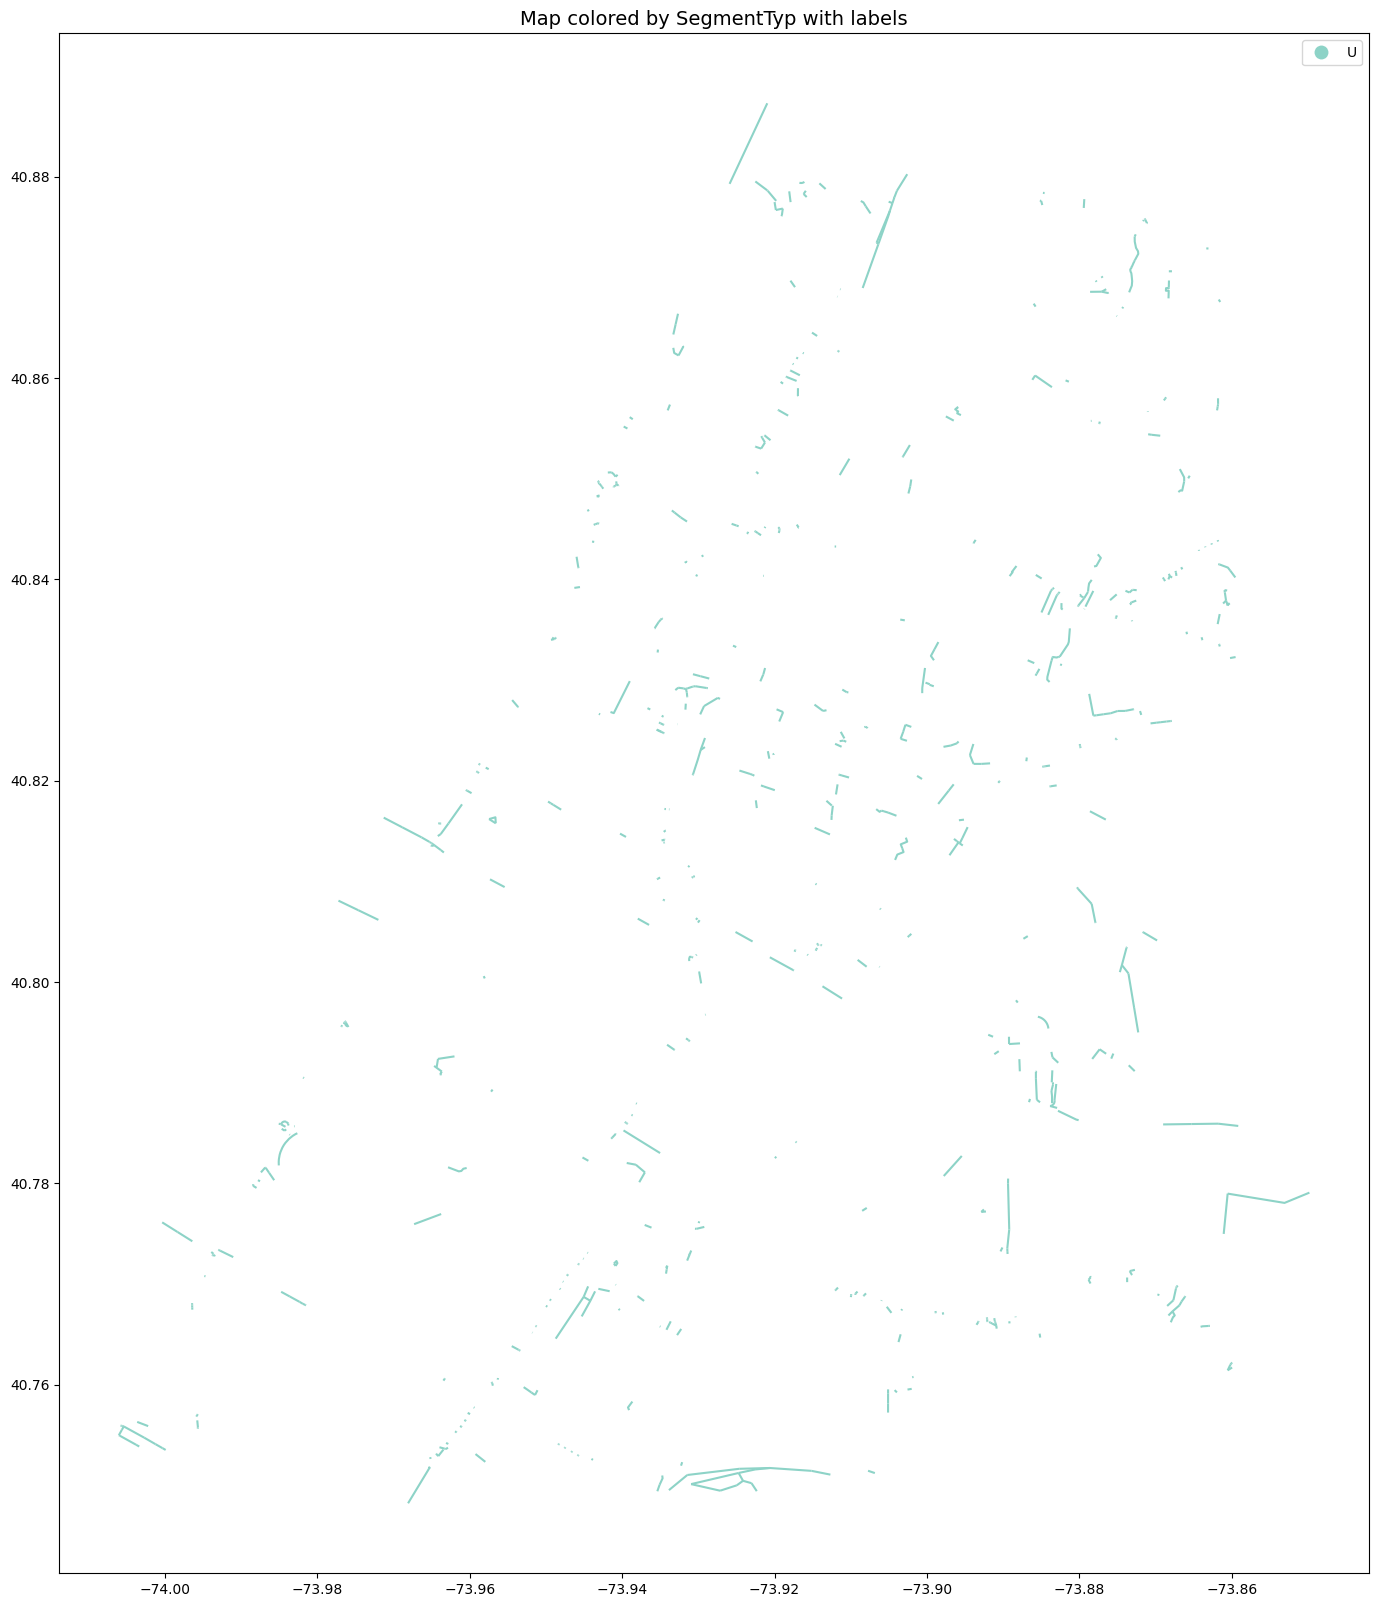

In [91]:
category_column = 'SegmentTyp'
label_column = 'OBJECTID'

# Plot the GeoDataFrame, color by category
df_segment = df_filter[~df_filter['SegmentTyp'].isin(['G', 'F'])]
# df_segment = df_segment[df_segment['SegmentTyp'].isin(['R'])]
# df_segment = df_segment.cx[-73.92:-73.96, 40.84:40.855]
df_segment = df_segment[df_segment['Street'] == '2000 CB BOUNDARY']
# Plot the GeoDataFrame, color by category
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
df_segment.plot(column=category_column, 
         ax=ax, 
         legend=True, 
         cmap='Set3')

# Add labels for each feature
# for idx, row in df_segment.iterrows():
#     ax.annotate(text=row[label_column], 
#                 xy=row['geometry'].centroid.coords[0],  # Position the label at the centroid of the geometry
#                 xytext=(3, 3),  # Offset the label a little bit
#                 textcoords="offset points",
#                 fontsize=10, 
#                 color='black')

# Set plot title
ax.set_title(f"Map colored by {category_column} with labels", fontsize=14)

# Show plot
plt.show()

In [107]:
df_filter.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [105]:
df_filter[['SegmentTyp', 'StreetWidth_Min', 'StreetWidth_Max', 'Number_Total_Lanes']].groupby('SegmentTyp').mean()

,StreetWidth_Min,StreetWidth_Max,Number_Total_Lanes
SegmentTyp,,,
B,45.554545,48.036036,3.613636
C,27.590909,28.567164,1.719697
E,21.844986,27.456663,1.509495
F,NaN,NaN,2.000000
G,NaN,NaN,NaN
R,32.624739,38.013540,2.831521
S,36.751515,38.269461,2.133333
T,27.475827,29.645570,2.228856
U,38.579460,41.816454,3.431798


In [79]:
df_filter.loc[df_filter['SegmentTyp'] == 'B', ['StreetWidth_Min', 'StreetWidth_Max']].describe()

,StreetWidth_Min,StreetWidth_Max
count,220.000000,222.000000
mean,45.554545,48.036036
std,8.133123,8.003877
min,30.000000,32.000000
25%,40.000000,44.000000
50%,50.000000,52.000000
75%,52.000000,52.000000
max,70.000000,72.000000


In [6]:
df_filter['FeatureTyp'].unique()

array(['0', 'W', '6', '9', 'A', '3', '5', 'F', '8', '7', '1', '2'],
      dtype=object)

In [2]:
df = df.dropna(subset=['the_geom', 'bin', 'cnstrct_yr', 'heightroof'], how='any')
df.shape

(1072673, 16)

In [3]:
df['lstmoddate'] = pd.to_datetime(df['lstmoddate'])
df['bin'] = df['bin'].astype('int')
df['cnstrct_yr'] = df['cnstrct_yr'].astype('int')
df['heightroof'] = df['heightroof'].astype('float')
df['feat_code'] = df['feat_code'].astype('int')
df.shape

(1072673, 16)

In [7]:
# built_before_2021 = df['cnstrct_yr'] <= 2021
# in_mahanttan_bronx = (df['bin'] // 10**6).isin([1, 2])
# higher_12_feet = df['heightroof'] >= 12
# is_building = df['feat_code'].isin([1006, 2100])
# constructed_before_date = (df['lstmoddate'] < '2021-07-24') & (df['lststatype'].isin(['Constructed']))
df_filter = df[built_before_2021 
               & in_mahanttan_bronx 
               & higher_12_feet 
               & is_building 
               & constructed_before_date
               ]
print(df_filter.shape)

(128733, 16)


In [8]:
# Filter the areas
df_filter['the_geom'] = df_filter['the_geom'].apply(lambda x: shape(x) if x is not None else x)
print(df_filter.shape)
df_filter = df_filter.set_geometry('the_geom', crs="EPSG:4326")
# lower_left = (40.75, -74.01)
# upper_right = (40.88, -73.86)
# lower_left[1]:upper_right[1], lower_left[0]:upper_right[0]
# coords:  [-74.01, 40.75, -73.86, 40.88]
COORDS = [-74.01, 40.75, -73.86, 40.88]
print(COORDS[1], COORDS[3])
df_filter = df_filter.cx[COORDS[0]:COORDS[2], COORDS[1]:COORDS[3]]
print(df_filter.shape)
# df = df.to_crs(epsg=2263)

C:\Users\USER\AppData\Local\Temp\ipykernel_6284\4222002081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['the_geom'] = df_filter['the_geom'].apply(lambda x: shape(x) if x is not None else x)


(128733, 16)
40.75 40.88
(61056, 16)


In [ ]:
gdf_build = gpd.GeoDataFrame(building, geometry="the_geom", crs="EPSG:4326")
gdf_build = gdf_build.cx[lower_left[1]:upper_right[1], lower_left[0]:upper_right[0]]

df = df.set_geometry('the_geom', crs="EPSG:4326")
gdf_build = gdf_build.to_crs(epsg=2263)

gdf_build['SHAPE_AREA'] = gdf_build['the_geom'].area
mod_date = pd.to_datetime(gdf_build['LSTMODDATE'])
build_cond = (gdf_build['CNSTRCT_YR'] <= 2021) \
    & (gdf_build['BIN'] // 10**6).isin([1, 2]) \
    & (gdf_build['HEIGHTROOF'] >= 12) \
    & (gdf_build['SHAPE_AREA'] >= 400) \
    & (gdf_build['FEAT_CODE'].isin([1006, 2100])) \
    & ((mod_date < '2021-07-24') & (gdf_build['LSTSTATYPE'].isin(['Constructed'])))

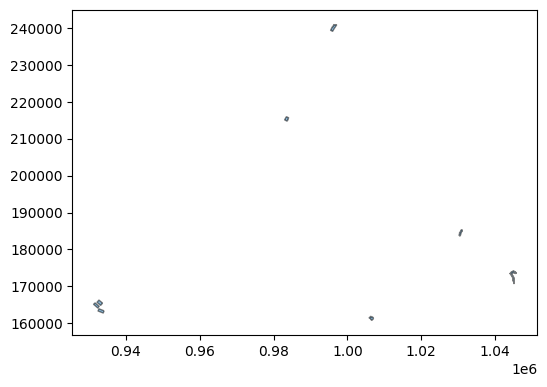

In [47]:
import matplotlib.pyplot as plt

df[df['shape_area'] > 500000].plot(figsize=(6, 6), edgecolor="black", alpha=0.5)
plt.show()

In [66]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1082896 entries, 0 to 1082895
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   the_geom    1082896 non-null  geometry
 1   bin         1082895 non-null  object  
 2   cnstrct_yr  1072674 non-null  object  
 3   lstmoddate  1082896 non-null  object  
 4   lststatype  1082554 non-null  object  
 5   doitt_id    1082896 non-null  object  
 6   heightroof  1082894 non-null  object  
 7   feat_code   1082896 non-null  object  
 8   groundelev  1082347 non-null  object  
 9   shape_area  1082896 non-null  float64 
 10  shape_len   1082896 non-null  object  
 11  base_bbl    1082895 non-null  object  
 12  mpluto_bbl  1082895 non-null  object  
 13  geomsource  1082585 non-null  object  
 14  globalid    1082896 non-null  object  
 15  name        2238 non-null     object  
dtypes: float64(1), geometry(1), object(14)
memory usage: 132.2+ MB


In [76]:
# df = df.dropna(subset=['the_geom', 'bin', 'cnstrct_yr', 'heightroof'])
df.shape

(1072673, 16)

In [74]:
df['feat_code'].astype('int')

0          2100
1          2100
2          2100
3          2100
4          2100
           ... 
1082891    2100
1082892    2100
1082893    2100
1082894    2100
1082895    2100
Name: feat_code, Length: 1072673, dtype: int64

In [65]:
df[df['heightroof'].astype('float') > 1000].to_crs(epsg=4326)

,the_geom,bin,cnstrct_yr,lstmoddate,lststatype,doitt_id,heightroof,feat_code,groundelev,shape_area,shape_len,base_bbl,mpluto_bbl,geomsource,globalid,name
47250,"MULTIPOLYGON (((-73.98089 40.76605, -73.98136 ...",1090180,2020,2025-01-08T00:00:00.000,Constructed,1277275,1550.0,1006,80,42118.187575,0.0,1010290043,1010297502,Other (Man,{C06C9BD7-D0C5-4206-910C-29F53CB9DE91},NaN
47982,"MULTIPOLYGON (((-73.97933 40.76539, -73.97917 ...",1088565,2009,2017-08-22T00:00:00.000,Constructed,1256209,1018.54529693,2100,46,21274.581193,0.0,1010100010,1010107506,Photogramm,{B7F69F31-A892-43D6-90C3-165A34511822},NaN
59350,"MULTIPOLYGON (((-74.01169 40.71123, -74.01166 ...",1088797,2009,2024-12-26T00:00:00.000,Constructed,1255672,1064.0,2100,21,56961.670810,0.0,1000580001,1000580001,Photogramm,{7FE1E9D1-FF38-4CE2-8B95-D01B9028FB57},NaN
59529,"MULTIPOLYGON (((-74.0022 40.75431, -74.00268 4...",1091590,2018,2024-12-26T00:00:00.000,Constructed,1114726,1039.0,2100,28,30772.916973,0.0,1007020150,1007027503,Other (Man,{A8956B5C-B377-41E4-A120-B426DA733209},NaN
61861,"MULTIPOLYGON (((-74.00182 40.75324, -74.00192 ...",1088961,2018,2019-01-22T00:00:00.000,Constructed,1284821,1265.0,2100,NaN,194750.610666,0.0,1007020125,1007027501,Other (Man,{91FD1265-8D09-4A99-B424-E1AE669D91D3},NaN
750560,"MULTIPOLYGON (((-73.98608 40.74891, -73.98482 ...",1015862,1931,2017-08-22T00:00:00.000,Constructed,778052,1238.79032716,2100,50,85500.730707,0.0,1008350041,1008350041,Photogramm,{CD891EF0-37A5-44C4-B98F-516067701802},Empire State Building
949323,"MULTIPOLYGON (((-73.97812 40.7621, -73.97778 4...",1090777,2020,2023-08-21T00:00:00.000,Constructed,1284000,1050.0,2100,66,19202.804306,0.0,1012690006,1012697502,Other (Man,{1F97082F-76A7-4F98-9025-8B69B9CA974D},NaN
982571,"MULTIPOLYGON (((-73.99889 40.75525, -73.9992 4...",1090122,2022,2023-01-19T00:00:00.000,Constructed,1297058,1029.0,2100,42,54237.354834,0.0,1007060017,1007060017,Other (Man,{01A7ED5B-2B63-4890-84E1-6F684FDEEC0C},NaN
983542,"MULTIPOLYGON (((-73.97756 40.76466, -73.97758 ...",1023728,1924,2021-01-04T00:00:00.000,Merged,1260269,1428.0,2100,58,20079.009693,0.0,1010100025,1010107507,Other (Man,{B4EC1860-C7A8-48CA-AC49-5218A7647592},NaN
985664,"MULTIPOLYGON (((-73.99975 40.75413, -74.00072 ...",1090274,2021,2021-02-26T00:00:00.000,Constructed,1288981,1011.0,2100,40,46900.039727,0.0,1007050039,1007050039,Other (Man,{F687CC83-A4F7-4B10-85C7-F7A5CDD18735},NaN
